In [101]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize

## Problem 1a)

Fisher information for a single neuron: 
$I(\theta_s) = T \sum_{i}\frac{1}{f_i(\theta_s)}(\frac{\partial f_i(\theta_s)}{\partial \theta_s})^2$
where $f_i = e^{-\frac{(\theta_s - \theta_i)^2}{2 \sigma^2}}$

where $\theta_s$ is the stimulus orientation, $\theta_i$ is the preferred orientation of the neuron and T is the measurement interval

In [102]:
#Define the tuning function
def tuning_function(theta_s, theta_i, sigma):
    return np.exp(-((theta_s - theta_i)**2) / (2 * sigma**2))

#Compute the derivative of the tuning function
def tuning_function_derivative(theta_s, theta_i, sigma):
    return -((theta_s - theta_i) / sigma**2) * tuning_function(theta_s, theta_i, sigma)

#Compute the Fisher Information
def fisher_information(theta_s, theta_i_list, sigma, T, epsilon=1e-9):
    f_i_list = tuning_function(theta_s, theta_i_list, sigma)
    df_i_list = tuning_function_derivative(theta_s, theta_i_list, sigma)
    fisher_info = np.sum((df_i_list**2) / (f_i_list + epsilon))
    return T * fisher_info

#Parameters
sigma = 10  # Width of the tuning curve in degrees
T = 1       # Measurement interval (arbitrary units)
theta_i_list = np.linspace(0, 180, 10)  # Preferred orientations of 10 neurons
theta_s_values = np.linspace(0, 180, 1000)  # Stimulus orientations to evaluate

#Calculate Fisher information for each theta_s
fisher_info_values = [fisher_information(theta_s, theta_i_list, sigma, T) for theta_s in theta_s_values]

#Find the orientation with the maximum Fisher information
max_fisher_info = max(fisher_info_values)
optimal_theta_s = theta_s_values[np.argmax(fisher_info_values)]

print(f"The orientation with the maximum Fisher information is θs = {optimal_theta_s:.2f}°")

The orientation with the maximum Fisher information is θs = 110.09°


## Problem 1b)

C:\Users\Beheerder\AppData\Local\Temp\ipykernel_27284\2231152092.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  fisher_info += (1 / f_i) * (df_i**2)
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_27284\2231152092.py:7: RuntimeWarning: invalid value encountered in scalar multiply
  fisher_info += (1 / f_i) * (df_i**2)
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_27284\2231152092.py:7: RuntimeWarning: overflow encountered in scalar divide
  fisher_info += (1 / f_i) * (df_i**2)


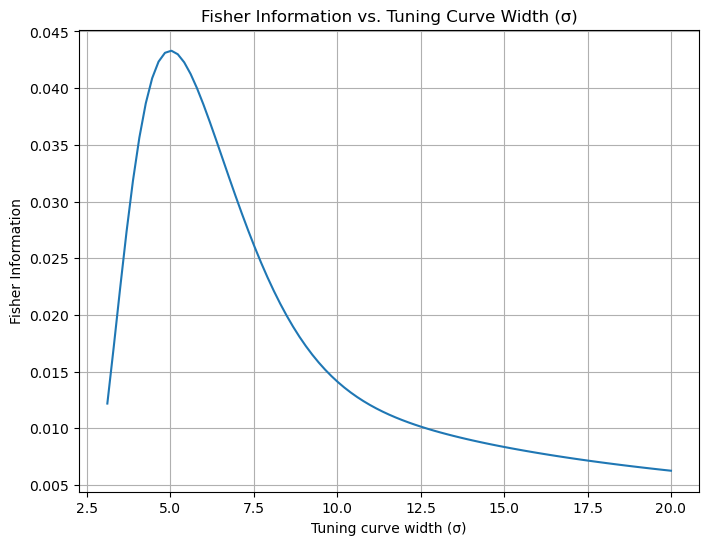

In [103]:
#Function to compute Fisher Information for a given stimulus orientation (theta_s)
def fisher_information(theta_s, theta_i_list, sigma):
    fisher_info = 0
    for theta_i in theta_i_list:
        f_i = tuning_function(theta_s, theta_i, sigma)
        df_i = tuning_function_derivative(theta_s, theta_i, sigma)
        fisher_info += (1 / f_i) * (df_i**2)
    return fisher_info

#New parameters
N = 10   # Number of neurons
sigma_values = np.linspace(1, 20, 100)  # Range of sigma values

#Compute Fisher Information for specific orientation
fisher_info_values = [fisher_information(110, theta_i_list, sigma) for sigma in sigma_values]  # Evaluate at theta_s = 110° (from assignment a)

#Plot the Fisher Information as a function of sigma
plt.figure(figsize=(8, 6))
plt.plot(sigma_values, fisher_info_values)
plt.xlabel("Tuning curve width (σ)")
plt.ylabel("Fisher Information")
plt.title("Fisher Information vs. Tuning Curve Width (σ)")
plt.grid()
plt.show()

## Problem 1c)

In the figure of 1b we can see that smaller σ (narrower tuning curves) will lead to higher Fisher information, as the system is more sensitive to small changes in the stimulus orientation. The neurons become "sharper", they can differentiate more precisely between different orientations. Larger σ will result in lower Fisher information, as the system becomes less sensitive to changes in the stimulus orientation. However, when the tuning curves become too narrow and the amount of neurons (N) stays the same, they might not cover a sufficiently broad range of stimuli. This could reduce the number of neurons effectively contributing to the overall Fisher Information, leading to a situation where the precision increases but the total sensitivity to the stimulus decreases. This means that there is a tradeoff between sensitivity and total fisher information. As we can see in the plot, there is a point where the width σ is small enough to increase Fisher Information (sensitivity) but not so small that it limits the total contribution from the neurons, resulting in an optimal tuning curve width. 

## Problem 1d)

In [ ]:
# Define the log-likelihood function
def log_likelihood(theta_s, theta_i_list, N_list, sigma, T):
    log_likelihood_value = 0
    for i in range(len(theta_i_list)):
        theta_i = theta_i_list[i]
        N_i = N_list[i]
        f_i = tuning_function(theta_s, theta_i, sigma)
        log_likelihood_value += N_i * np.log(f_i * T) - f_i * T - np.log(math.factorial(N_i))  # Poisson log-likelihood
    return -log_likelihood_value  # We minimize the negative log-likelihood

#New parameters
T = 1  # Measurement interval
true_theta_s = optimal_theta_s  # Optimal stimulus orientation of assignment a) to use for MLE 

# Simulate the spike counts 
N_list = np.random.poisson(lam=tuning_function(true_theta_s, theta_i_list, sigma) * T, size=N)

# Use  numerical optimizer to find the MLE for theta_s
result = minimize(log_likelihood, x0=90, args=(theta_i_list, N_list, sigma, T), bounds=[(0, 180)])

# Extract the estimated stimulus orientation
estimated_theta_s = result.x[0]

# Print the result
print(f"True stimulus orientation: {true_theta_s}°")
print(f"Estimated stimulus orientation using MLE: {estimated_theta_s:.2f}°")

True stimulus orientation: 110.09009009009009°
Estimated stimulus orientation using MLE: 106.83°


## Problem 1e)

In [105]:
# Function to generate spike counts for each neuron for a given stimulus orientation
def generate_spike_counts(theta_s, theta_i_list, sigma, T):
    # Calculate the firing rate for each neuron given the stimulus orientation
    firing_rates = [tuning_function(theta_s, theta_i, sigma) for theta_i in theta_i_list]
    
    # Generate the spike counts for each neuron using a Poisson distribution
    N_list = np.random.poisson(lam=np.array(firing_rates) * T)  # Poisson spike count for each neuron
    
    return N_list

# Function to calculate the Fisher Information for a given stimulus orientation
def fisher_information(theta_s, theta_i_list, sigma, T):
    fisher_info = 0
    for theta_i in theta_i_list:
        f_i = tuning_function(theta_s, theta_i, sigma)
        df_i = tuning_function_derivative(theta_s, theta_i, sigma)
        fisher_info += (1 / f_i) * (df_i**2)
    return T * fisher_info

# Calculate Fisher information for each theta_s (we'll use this later to find optimal orientation)
fisher_info_values = [fisher_information(theta_s, theta_i_list, sigma, T) for theta_s in theta_s_values]

# Find the orientation with the maximum Fisher information (optimal stimulus orientation)
optimal_theta_s = theta_s_values[np.argmax(fisher_info_values)]

# Print the optimal stimulus orientation from Fisher information calculation
print(f"Optimal stimulus orientation (max Fisher information): {optimal_theta_s:.2f}°")

# Generate spike counts for a single trial with the optimal stimulus orientation
N_list = generate_spike_counts(optimal_theta_s, theta_i_list, sigma, T)

# Print the spike counts for the trial
print(f"Spike counts for stimulus orientation θs = {optimal_theta_s}°:")
for i, N in enumerate(N_list):
    print(f"Neuron {i+1} (θi = {theta_i_list[i]}°): {N} spikes")


Optimal stimulus orientation (max Fisher information): 70.09°
Spike counts for stimulus orientation θs = 70.09009009009009°:
Neuron 1 (θi = 0.0°): 0 spikes
Neuron 2 (θi = 20.0°): 0 spikes
Neuron 3 (θi = 40.0°): 0 spikes
Neuron 4 (θi = 60.0°): 1 spikes
Neuron 5 (θi = 80.0°): 2 spikes
Neuron 6 (θi = 100.0°): 0 spikes
Neuron 7 (θi = 120.0°): 0 spikes
Neuron 8 (θi = 140.0°): 0 spikes
Neuron 9 (θi = 160.0°): 0 spikes
Neuron 10 (θi = 180.0°): 0 spikes


## Problem 1f)

In [106]:
# Function to estimate MLE for the stimulus orientation based on the spike counts
def estimate_theta_s(N_list, theta_i_list, sigma, T):

    # Define the log-likelihood function for the Poisson distribution
    def log_likelihood(theta_s, N_list, theta_i_list, sigma, T):
        log_likelihood_value = 0
        for i, N_i in enumerate(N_list):
            f_i = tuning_function(theta_s, theta_i_list[i], sigma)
            log_likelihood_value += N_i * np.log(f_i * T) - f_i * T - np.log(math.factorial(N_i))  # Poisson log-likelihood
        return log_likelihood_value

    # Maximize the log-likelihood to find the MLE for theta_s
    result = minimize(lambda theta_s: -log_likelihood(theta_s, N_list, theta_i_list, sigma, T), 90, bounds=[(0, 180)])
    return result.x[0]

theta_s_true = 90  # True stimulus orientation (degrees)

# Number of trials for bias and variance estimation
N_trials = 1000

# Lists to store MLE estimates
mle_estimates = []

# Perform multiple trials to estimate bias and variance
for _ in range(N_trials):
    # Generate spike counts for a single trial with the true stimulus orientation
    N_list = generate_spike_counts(theta_s_true, theta_i_list, sigma, T)
    
    # Estimate theta_s using the MLE
    theta_s_hat = estimate_theta_s(N_list, theta_i_list, sigma, T)
    mle_estimates.append(theta_s_hat)

# Convert to numpy array for easier computation
mle_estimates = np.array(mle_estimates)

# Compute bias
bias = np.mean(mle_estimates) - theta_s_true

# Compute variance
variance = np.var(mle_estimates)

# Compute Fisher Information numerically at the true stimulus orientation
fisher_info = fisher_information(theta_s_true, theta_i_list, sigma, T)

# Compare the variance with the Fisher information (the inverse of Fisher information gives an estimate of variance)
variance_fisher_info = 1 / fisher_info

# Print results
print(f"Bias of MLE: {bias:.4f}")
print(f"Variance of MLE: {variance:.4f}")
print(f"Fisher Information: {fisher_info:.4f}")
print(f"Inverse of Fisher Information (theoretical variance): {variance_fisher_info:.4f}")


Bias of MLE: 0.2860
Variance of MLE: 59.9761
Fisher Information: 0.0141
Inverse of Fisher Information (theoretical variance): 70.7609


## Problem 2a)

## Problem 2b)

## Problem 2c)

## Problem 3a)

The study by Chelaru and Dragoi discusses Fisher information in the context of heterogeneous versus homogeneous neuronal populations to understand how population coding efficiency is affected by the diversity of neuronal responses. They found that increasing the heterogeneity of neuronal responses leads to an increase in Fisher information, indicating improved coding efficiency.

The authors explore the reasons behind this improvement. Fisher information depends on both the shape of individual neuron tuning curves and the noise correlations between neurons. By examining these factors, they determine that the increase in Fisher information with heterogeneity is primarily due to changes in the structure of correlations rather than changes in the tuning curves themselves. Specifically, they found that heterogeneity leads to a decrease in noise correlations between neurons.

To further support this conclusion, they computed the "shuffled information," which effectively removes the effect of correlations. This analysis revealed that the increase in coding efficiency due to heterogeneity was significantly smaller when correlations were removed. This reinforces the idea that the improvement in Fisher information is largely driven by the changes in correlation structure brought about by the diversity of neuronal responses. Therefore, the paper suggests that the heterogeneity of neuronal responses is beneficial for sensory coding because it alters noise correlations in a way that enhances the information encoded in the population activity.

## Problem 3b)

Neurons in homogeneous populations have similar tuning curves, sensitivities, and noise properties. This can lead to redundant information and lower efficiency in coding.
In heterogeneous populations, neurons have diverse tuning properties (e.g., different slopes, offsets, preferred stimuli) and possibly varying noise properties.This allows the population to encode more information efficiently because of complementary contributions to coding.


In the equation, the Fisher Information J(x) quantifies how well a stimulus parameter x can be estimated from the neural responses, considering both the signal and noise contributions. f(x) represents the slopes of the tuning curves. If all neurons are homogeneous, the tuning curve derivatives f'(x) are similar, leading to redundancy. Redundancy does not increase Fisher Information much because redundant signals do not add new information.
In contrast, heterogeneous neurons have diverse tuning curve derivatives, which means they collectively cover the stimulus space more efficiently. Steeper and diverse tuning curves ensure the population responds differently to small stimulus changes, maximizing Fisher Information.

Q(x) is the covariance matrix of neural responses, which describes noise correlations. In the article we read that homogeneous populations often exhibit strong, correlated noise because neurons are similar and respond in similar ways. Noise correlations degrade Fisher Information because correlated noise cannot be easily averaged out. In heterogeneous populations, the neurons' diversity in responses reduces correlations, leading to more uncorrelated noise. A less correlated noise structure increases Q-1(x), boosting Fisher Information. 

The Trace Term (0.5Tr[...]) reflects how noise correlations change with the stimulus. If noise is stimulus-dependent, it can either help or hinder efficient coding. Heterogeneous neurons tend to have weaker, less redundant noise correlations, improving signal-to-noise ratio and overall information efficiency.

Homogeneous populations may be limited because they represent only a small portion of the stimulus space efficiently. Redundant responses and strong correlations reduce their ability to encode information.
Heterogeneous populations overcome these limitations because of the aspects mentioened above. The equation overall highlights that heterogeneity improves coding efficiency by enhancing the signal term (through diverse tuning curves) and reducing the effects of noise correlations (through the covariance term Q(X)).
